In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("C:/Users/Yash/Desktop/ML_Projects/Data/Summer Intern Case Study Data_2023.xlsx")

In [3]:
df.head()

,Week,Event,Summary Group,Tactic,Execution,Sales Volume,Profit,Spend
0,2020-10-10,Amazon Display,Media,Amazon Display,3.492711,7.540394e+04,4524.236148,14515.210564
1,2020-10-10,Amazon Search,Media,Amazon Search,0.802291,9.079212e+04,5447.527383,15734.444640
2,2020-10-10,Competitive,Base,Competitive,0.000000,1.218384e+05,7310.306924,0.000000
3,2020-10-10,Core/Base,Base,Core/Base,0.000000,1.581304e+07,948782.305600,0.000000
4,2020-10-10,COVID,Base,COVID,0.000000,-7.462117e+05,-44772.703120,0.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3120 entries, 0 to 3119
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Week           3120 non-null   datetime64[ns]
 1   Event          3120 non-null   object        
 2   Summary Group  3120 non-null   object        
 3   Tactic         3120 non-null   object        
 4   Execution      3120 non-null   float64       
 5   Sales Volume   3120 non-null   float64       
 6   Profit         3120 non-null   float64       
 7   Spend          3120 non-null   float64       
dtypes: datetime64[ns](1), float64(4), object(3)
memory usage: 195.1+ KB


In [5]:
df["Sales Volume"].value_counts()

0.000000e+00    830
7.540394e+04      1
1.350196e+06      1
3.201748e+05      1
1.970914e+05      1
               ... 
1.603450e+04      1
2.340902e+02      1
1.429005e+03      1
5.332172e-01      1
2.246527e+05      1
Name: Sales Volume, Length: 2291, dtype: int64

In [6]:
df["Execution"].value_counts()

0.000000        1720
11538.461540      52
0.001063          20
0.726131           6
1.134340           6
                ... 
0.698042           1
4.693345           1
0.001764           1
10.560551          1
0.241373           1
Name: Execution, Length: 1232, dtype: int64

In [7]:
df["Cost_Per_Acquisition"] = df["Spend"] / df["Sales Volume"]

In [8]:
df["Cost_Per_Acquisition"].value_counts()

0.000000    843
inf          46
0.192499      1
2.362908      1
0.059356      1
           ... 
0.084666      1
0.249377      1
0.238760      1
0.154409      1
0.143341      1
Name: Cost_Per_Acquisition, Length: 1449, dtype: int64

In [9]:
df["Cost_Per_Acquisition"].isnull().sum()

784

In [10]:
df['Week'] = pd.to_datetime(df['Week'])

df['year'] = df['Week'].dt.year

# Group the data by year and sum the 'profit' column for each year
yearly_profit = df.groupby('year')['Profit'].sum()

# Print the results
print(yearly_profit)


year
2020    1.310664e+07
2021    6.322712e+07
2022    4.245254e+07
Name: Profit, dtype: float64


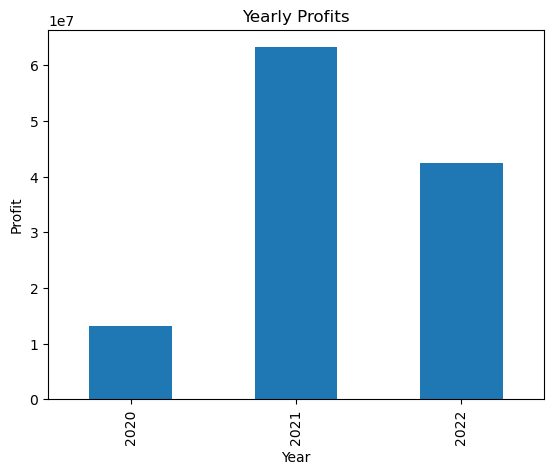

In [11]:
yearly_profit.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Profit')
plt.title('Yearly Profits')
plt.show()

In [12]:
#df['date'] = pd.to_datetime(df['Week'], format='%m/%d/%Y')
df['month'] = df['Week'].dt.month
monthly_profit = df.groupby('month')['Profit'].sum()
print(monthly_profit)

month
1     1.486258e+07
2     9.355149e+06
3     9.908282e+06
4     9.668223e+06
5     9.130674e+06
6     7.452129e+06
7     9.500081e+06
8     1.050571e+07
9     9.477663e+06
10    1.147538e+07
11    8.826168e+06
12    8.624255e+06
Name: Profit, dtype: float64


In [13]:
df['Week'] = pd.to_datetime(df['Week'], format='%m/%d/%Y')


In [14]:
df["Week"]

0      2020-10-10
1      2020-10-10
2      2020-10-10
3      2020-10-10
4      2020-10-10
          ...    
3115   2022-10-01
3116   2022-10-01
3117   2022-10-01
3118   2022-10-01
3119   2022-10-01
Name: Week, Length: 3120, dtype: datetime64[ns]

In [15]:
df['month_name'] = df['Week'].dt.strftime('%B')
df['year'] = df['Week'].dt.year
monthly_profit = df.groupby(['month_name', 'year'])['Profit'].sum()
print(monthly_profit)

month_name  year
April       2021    4.655417e+06
            2022    5.012806e+06
August      2021    6.384911e+06
            2022    4.120803e+06
December    2020    4.034037e+06
            2021    4.590218e+06
February    2021    4.621991e+06
            2022    4.733158e+06
January     2021    7.416511e+06
            2022    7.446069e+06
July        2021    5.169221e+06
            2022    4.330860e+06
June        2021    3.905861e+06
            2022    3.546268e+06
March       2021    5.246414e+06
            2022    4.661868e+06
May         2021    5.216512e+06
            2022    3.914161e+06
November    2020    4.411034e+06
            2021    4.415134e+06
October     2020    4.661567e+06
            2021    5.925169e+06
            2022    8.886470e+05
September   2021    5.679759e+06
            2022    3.797904e+06
Name: Profit, dtype: float64


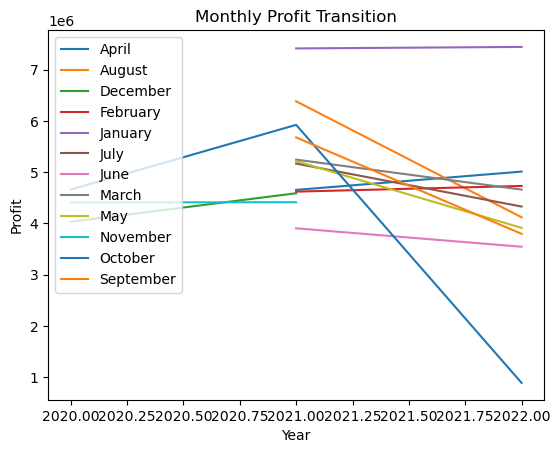

In [16]:
monthly_profit_unstacked = monthly_profit.unstack(level=1)

# plot the graph for each month
for month in monthly_profit_unstacked.index:
    monthly_profit_unstacked.loc[month].plot(label=month)

# set the title and axis labels
plt.title('Monthly Profit Transition')
plt.xlabel('Year')
plt.ylabel('Profit')

# show the legend and the plot
plt.legend()
plt.show()

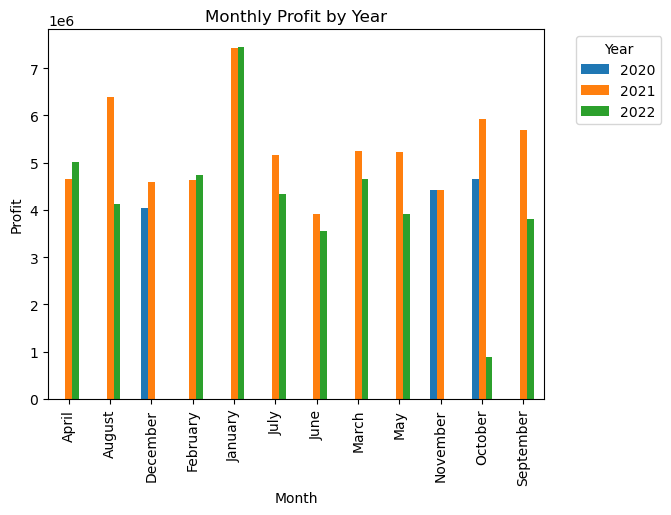

In [17]:
monthly_profit = monthly_profit.reset_index().pivot(index='month_name', columns='year', values='Profit')

# plot a bar plot
ax = monthly_profit.plot(kind='bar')
ax.set_xlabel('Month')
ax.set_ylabel('Profit')
ax.set_title('Monthly Profit by Year')
ax.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')


plt.show()

In [18]:
df["Tactic"].unique()

array(['Amazon Display', 'Amazon Search', 'Competitive', 'Core/Base',
       'COVID', 'Digital Display', 'Digital Coupons', 'Distribution',
       'Ecomm: Retail Display', 'Ecomm: Search', 'Influencer',
       'New Subscribe & Save', 'OLV', 'Paid Search: Criteo',
       'Paid Search: Google+Bing', 'Paid Search: Pinterest',
       'Paid Social: Meta', 'Paid Social: Pinterest',
       'Paid Social: Twitter', 'PR', 'Price', 'Sampling', 'Seasonality',
       'Trade Promo', 'Trend', 'VPC', 'YouTube'], dtype=object)

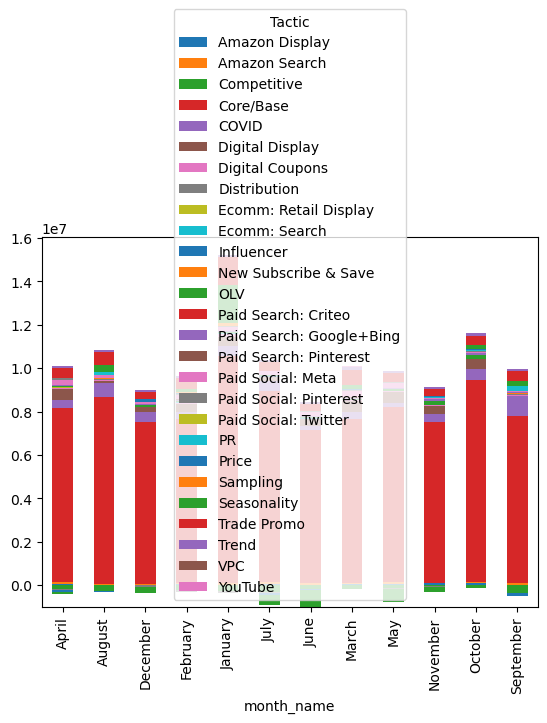

In [19]:
monthly_profit = df.groupby(['month_name', 'Tactic']).agg({'Profit': 'sum'})
monthly_profit = monthly_profit.reset_index().pivot(index='month_name', columns='Tactic', values='Profit')

monthly_profit[['Amazon Display', 'Amazon Search', 'Competitive', 'Core/Base',
       'COVID', 'Digital Display', 'Digital Coupons', 'Distribution',
       'Ecomm: Retail Display', 'Ecomm: Search', 'Influencer',
       'New Subscribe & Save', 'OLV', 'Paid Search: Criteo',
       'Paid Search: Google+Bing', 'Paid Search: Pinterest',
       'Paid Social: Meta', 'Paid Social: Pinterest',
       'Paid Social: Twitter', 'PR', 'Price', 'Sampling', 'Seasonality',
       'Trade Promo', 'Trend', 'VPC', 'YouTube']].plot(kind='bar', stacked=True)
ax.legend(loc='upper left')



In [20]:
df.head()

,Week,Event,Summary Group,Tactic,Execution,Sales Volume,Profit,Spend,Cost_Per_Acquisition,year,month,month_name
0,2020-10-10,Amazon Display,Media,Amazon Display,3.492711,7.540394e+04,4524.236148,14515.210564,0.192499,2020,10,October
1,2020-10-10,Amazon Search,Media,Amazon Search,0.802291,9.079212e+04,5447.527383,15734.444640,0.173302,2020,10,October
2,2020-10-10,Competitive,Base,Competitive,0.000000,1.218384e+05,7310.306924,0.000000,0.000000,2020,10,October
3,2020-10-10,Core/Base,Base,Core/Base,0.000000,1.581304e+07,948782.305600,0.000000,0.000000,2020,10,October
4,2020-10-10,COVID,Base,COVID,0.000000,-7.462117e+05,-44772.703120,0.000000,-0.000000,2020,10,October


                    Sales Volume        Profit         Spend
Summary Group                                               
Base                1.702652e+09  1.021591e+08  0.000000e+00
Media               1.619078e+08  9.714469e+06  1.675635e+07
Trade               1.037003e+08  6.222021e+06  1.267035e+07
Consumer Promotion  1.151139e+07  6.906833e+05  2.698325e+06


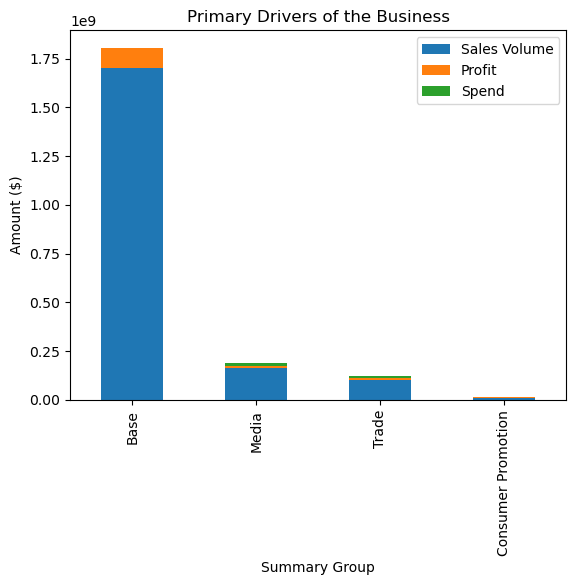

In [25]:
# group data by Summary Group and calculate total sales, profit, and spend
grouped_data = df.groupby('Summary Group').sum()[['Sales Volume', 'Profit', 'Spend']]
grouped_data = grouped_data.sort_values(by="Profit", ascending = False)
print(grouped_data)
# plot stacked bar chart of grouped data
grouped_data.plot(kind='bar', stacked=True)
plt.ylabel('Amount ($)')
plt.title('Primary Drivers of the Business')
plt.show()


In [22]:
df.head()

,Week,Event,Summary Group,Tactic,Execution,Sales Volume,Profit,Spend,Cost_Per_Acquisition,year,month,month_name
0,2020-10-10,Amazon Display,Media,Amazon Display,3.492711,7.540394e+04,4524.236148,14515.210564,0.192499,2020,10,October
1,2020-10-10,Amazon Search,Media,Amazon Search,0.802291,9.079212e+04,5447.527383,15734.444640,0.173302,2020,10,October
2,2020-10-10,Competitive,Base,Competitive,0.000000,1.218384e+05,7310.306924,0.000000,0.000000,2020,10,October
3,2020-10-10,Core/Base,Base,Core/Base,0.000000,1.581304e+07,948782.305600,0.000000,0.000000,2020,10,October
4,2020-10-10,COVID,Base,COVID,0.000000,-7.462117e+05,-44772.703120,0.000000,-0.000000,2020,10,October


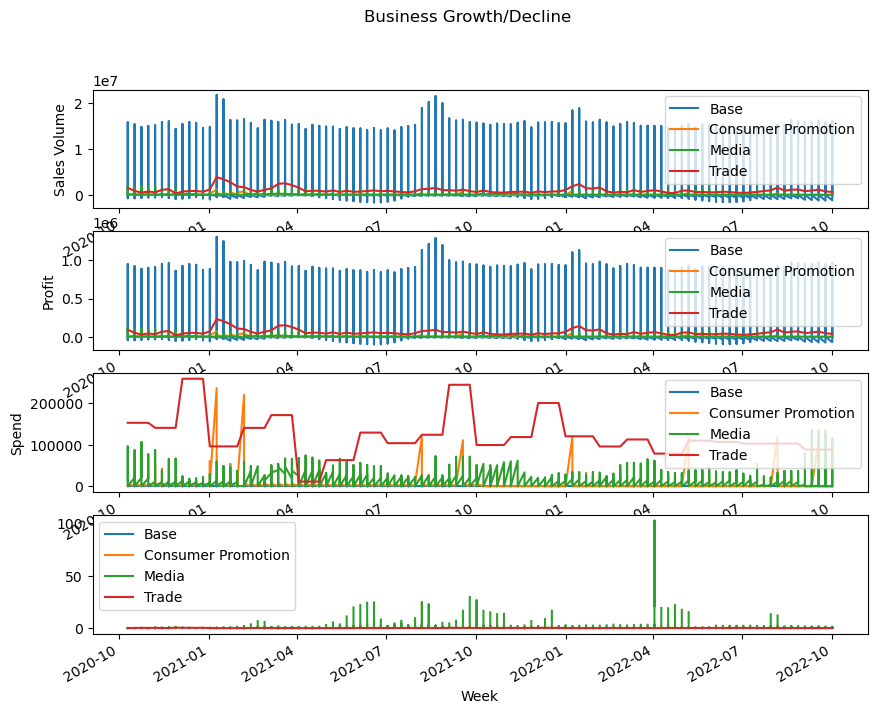

In [23]:
# convert week column to datetime format and set as index
df['Week'] = pd.to_datetime(df['Week'])
df.set_index('Week', inplace=True)

# plot sales volume, profit, and spend over time
fig, ax = plt.subplots(4, 1, figsize=(10, 8))
df.groupby('Summary Group')['Sales Volume'].plot(ax=ax[0], legend=True)
ax[0].set_ylabel('Sales Volume')
df.groupby('Summary Group')['Profit'].plot(ax=ax[1], legend=True)
ax[1].set_ylabel('Profit')
df.groupby('Summary Group')['Spend'].plot(ax=ax[2], legend=True)
ax[2].set_ylabel('Spend')
df.groupby('Summary Group')['Cost_Per_Acquisition'].plot(ax=ax[3], legend=True)
ax[0].set_ylabel('Cost Per Acquisition')
plt.suptitle('Business Growth/Decline')
plt.show()